In [1]:
#importamos librerias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#cargar archivo csv
df=pd.read_csv('Datos_limpios_Los_Angeles_Estados_Unidos.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,last_scraped,source,description,neighborhood_overview,host_name,host_since,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,45540,city scrape,The whole group will enjoy easy access to ever...,No overview available,Moon,41294.0,within a few hours,f,Brentwood,"['email', 'phone']",...,4.90,5.00,5.0,4.90,4.80,3.9,4.0,0.2,0.0,0.80
1,45540,previous scrape,No description available,No overview available,Ida,43668.0,Unknown,f,South Robertson,"['email', 'phone']",...,4.90,5.00,5.0,4.90,4.80,1.0,1.0,0.0,0.0,0.80
2,45540,city scrape,"Charming, renovated home in the Beverly Hills ...",No overview available,Tiana,45054.0,within a day,f,Unknown,"['email', 'phone']",...,4.90,5.00,5.0,4.90,4.80,4.0,4.0,0.0,0.0,0.80
3,45539,city scrape,Relax in this unique and serene retreat.,No overview available,Dan,44522.0,a few days or more,f,Walnut Valley,['phone'],...,5.00,5.00,5.0,5.00,4.80,4.0,1.0,0.2,0.0,0.06
4,45540,city scrape,Welcome to our stunning apartment nestled in t...,No overview available,Farkhat,45136.0,within an hour,t,Downtown,['phone'],...,4.98,4.93,5.0,4.73,4.77,3.0,3.0,0.0,0.0,3.41


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45533 entries, 0 to 45532
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  45533 non-null  int64  
 1   source                                        45533 non-null  object 
 2   description                                   45533 non-null  object 
 3   neighborhood_overview                         45533 non-null  object 
 4   host_name                                     45533 non-null  object 
 5   host_since                                    45533 non-null  float64
 6   host_response_time                            45533 non-null  object 
 7   host_is_superhost                             45533 non-null  object 
 8   host_neighbourhood                            45533 non-null  object 
 9   host_verifications                            45533 non-null 

In [4]:
#f1=df.iloc[ :  , [8,9,10,13,14,20,21,24,25,26,28,40,44,45,49] ]
f1=df

In [5]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45533 entries, 0 to 45532
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  45533 non-null  int64  
 1   source                                        45533 non-null  object 
 2   description                                   45533 non-null  object 
 3   neighborhood_overview                         45533 non-null  object 
 4   host_name                                     45533 non-null  object 
 5   host_since                                    45533 non-null  float64
 6   host_response_time                            45533 non-null  object 
 7   host_is_superhost                             45533 non-null  object 
 8   host_neighbourhood                            45533 non-null  object 
 9   host_verifications                            45533 non-null 

In [6]:
#convertimos las variables de tipo object a tipo numérico 
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
#f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
#f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})
#frecuencias = f1['property_type'].value_counts()
#f1['property_type'] = f1['property_type'].map(frecuencias)
#print(f1[['property_type']])


f1['host_acceptance_rate'] = f1['host_acceptance_rate'].astype(str).str.rstrip('%')
f1['host_acceptance_rate'] = pd.to_numeric(f1['host_acceptance_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

f1['price'] = f1['price'].astype(str).str.rstrip('$')
f1['price'] = pd.to_numeric(f1['price'], errors='coerce').fillna(0)

C:\Users\angel\AppData\Local\Temp\ipykernel_15580\3682947381.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})


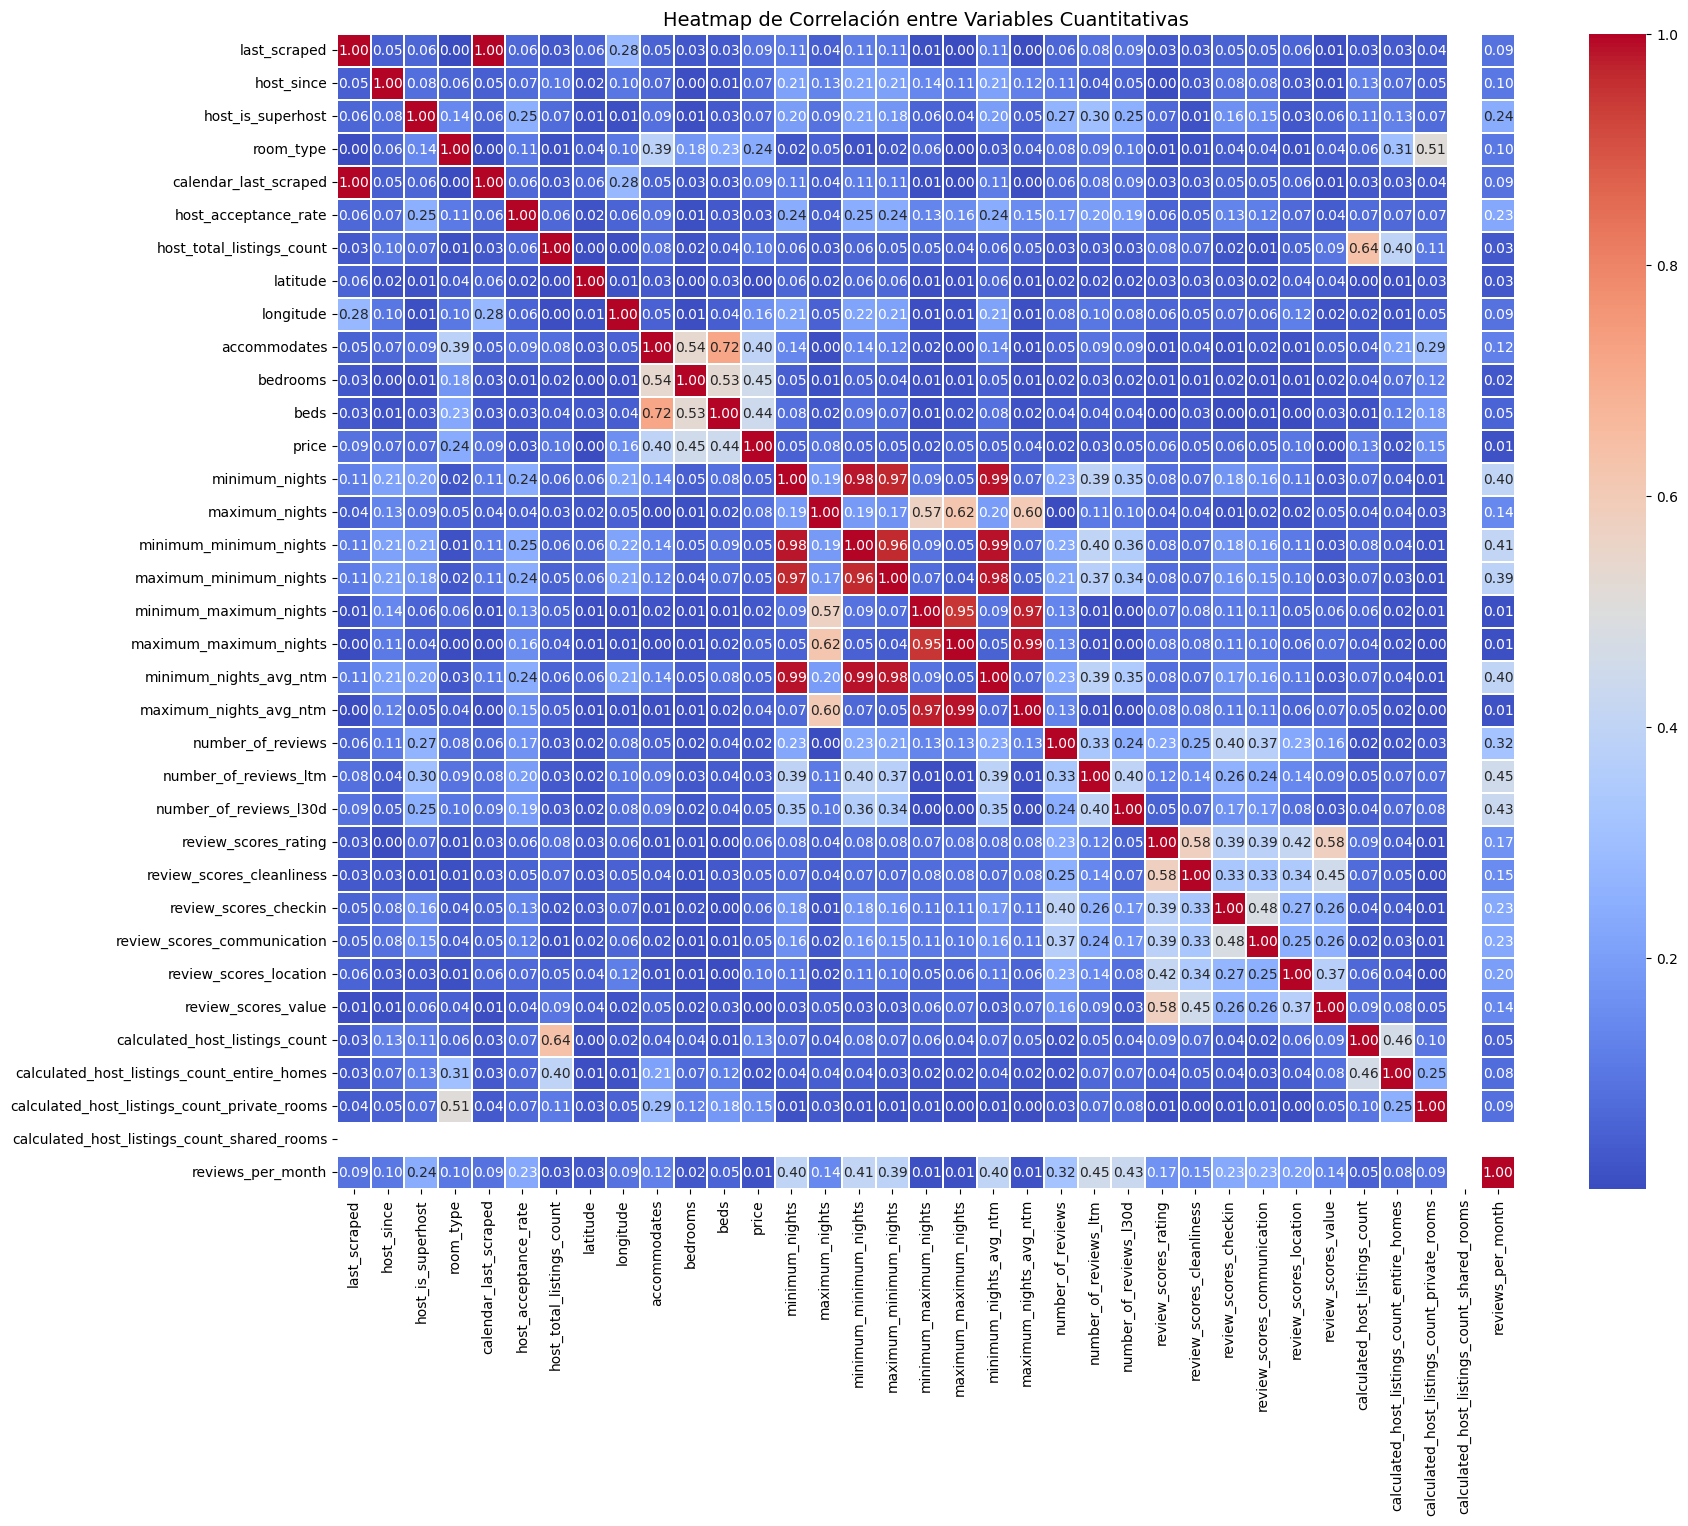

In [7]:
df_numeric = f1.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()
corr_matrix2= abs(corr_matrix)

# Crear el heatmap
plt.figure(figsize=(19, 15))  # Ajusta el tamaño
sns.heatmap(corr_matrix2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.10)

# Configurar el título
plt.title("Heatmap de Correlación entre Variables Cuantitativas", fontsize=14)

# Mostrar la gráfica
plt.show()

**Graficas**

<Axes: xlabel='number_of_reviews', ylabel='host_since'>

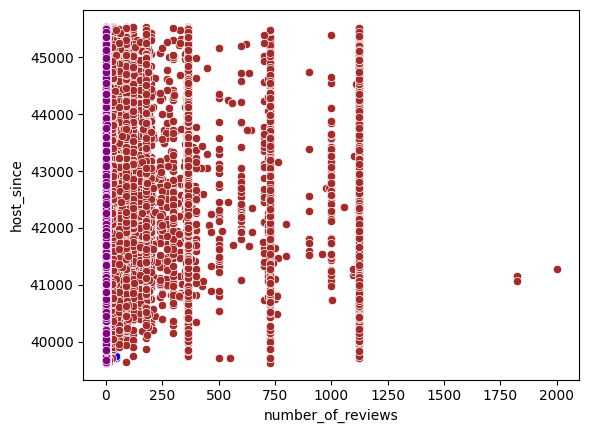

In [9]:
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_since', color="blue", data=f1)
sns.scatterplot(x='review_scores_cleanliness', y='host_since', color="red", data=f1)
sns.scatterplot(x='maximum_nights', y='host_since', color="brown", data=f1)
sns.scatterplot(x='review_scores_communication', y='host_since', color="pink", data=f1)
sns.scatterplot(x='reviews_per_month', y='host_since', color="purple", data=f1)

In [12]:
# Convertir 't' a 1 y 'unavailable' a 0
f1['has_availability'] = f1['has_availability'].map({'t': 1, 'unavailable': 0})

# Reemplazar valores NaN con 0 y convertir a enteros
f1['has_availability'] = f1['has_availability'].fillna(0).astype(int)

# Verificar los primeros valores después de la conversión
print(f1['has_availability'].head())

0    1
1    0
2    1
3    1
4    1
Name: has_availability, dtype: int64


<Axes: xlabel='host_is_superhost', ylabel='host_acceptance_rate'>

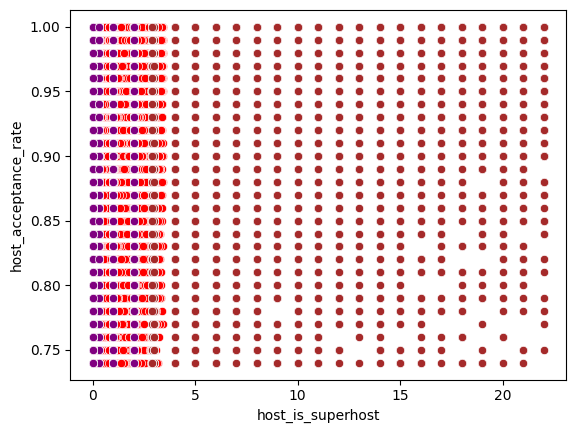

In [13]:
from turtle import color


sns.scatterplot(x='host_is_superhost', y='host_acceptance_rate', color="blue", data=f1)
sns.scatterplot(x='reviews_per_month', y='host_acceptance_rate', color="red", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='host_acceptance_rate', color="brown", data=f1)
sns.scatterplot(x='has_availability', y='host_acceptance_rate', color="pink", data=f1)
sns.scatterplot(x='number_of_reviews_l30d', y='host_acceptance_rate', color="purple", data=f1)

<Axes: xlabel='number_of_reviews_ltm', ylabel='host_is_superhost'>

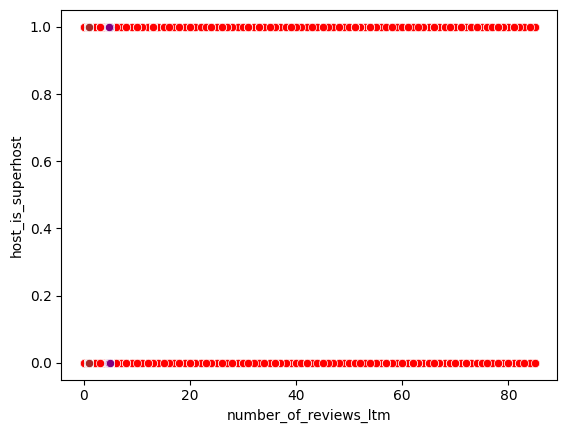

In [14]:
from turtle import color


sns.scatterplot(x='number_of_reviews_ltm', y='host_is_superhost', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews', y='host_is_superhost', color="red", data=f1)
sns.scatterplot(x='host_acceptance_rate', y='host_is_superhost', color="brown", data=f1)
sns.scatterplot(x='review_scores_rating', y='host_is_superhost', color="pink", data=f1)
sns.scatterplot(x='review_scores_value', y='host_is_superhost', color="purple", data=f1)

<Axes: xlabel='room_type', ylabel='calculated_host_listings_count'>

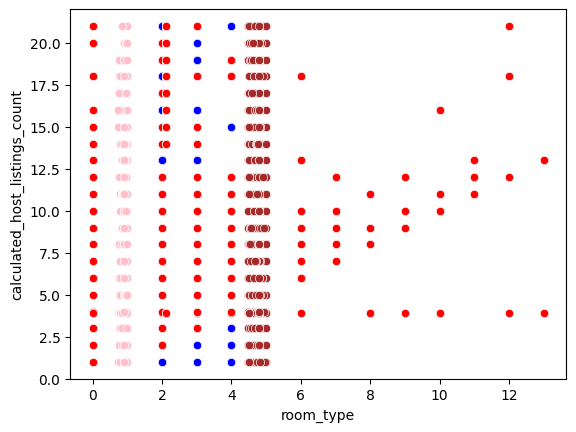

In [15]:
from turtle import color


sns.scatterplot(x='room_type', y='calculated_host_listings_count', color="blue", data=f1)
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='calculated_host_listings_count', color="red", data=f1)
sns.scatterplot(x='review_scores_value', y='calculated_host_listings_count', color="brown", data=f1)
sns.scatterplot(x='host_acceptance_rate', y='calculated_host_listings_count', color="pink", data=f1)


<Axes: xlabel='price', ylabel='room_type'>

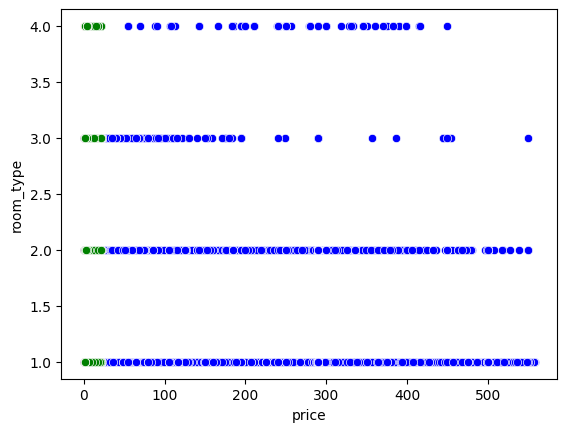

In [16]:
from turtle import color


sns.scatterplot(x='price', y='room_type', color="blue", data=f1)
sns.scatterplot(x='accommodates', y='room_type', color="red", data=f1)
sns.scatterplot(x='bedrooms', y='room_type', color="brown", data=f1)
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='room_type', color="pink", data=f1)
sns.scatterplot(x='beds', y='room_type', color="purple", data=f1)
sns.scatterplot(x='calculated_host_listings_count', y='room_type', color="green", data=f1)

<Axes: xlabel='bedrooms', ylabel='accommodates'>

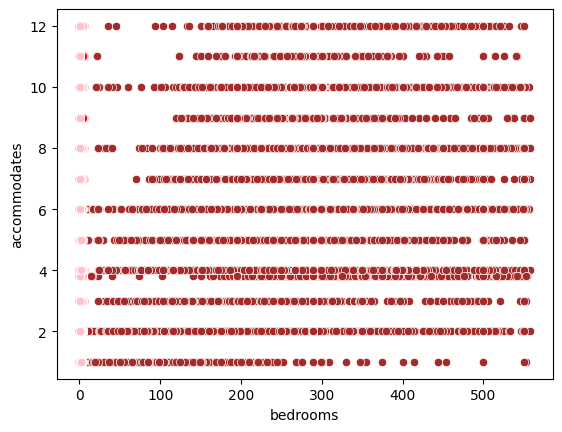

In [17]:
from turtle import color


sns.scatterplot(x='bedrooms', y='accommodates', color="blue", data=f1)
sns.scatterplot(x='beds', y='accommodates', color="red", data=f1)
sns.scatterplot(x='price', y='accommodates', color="brown", data=f1)
sns.scatterplot(x='room_type', y='accommodates', color="pink", data=f1)

<Axes: xlabel='price', ylabel='bedrooms'>

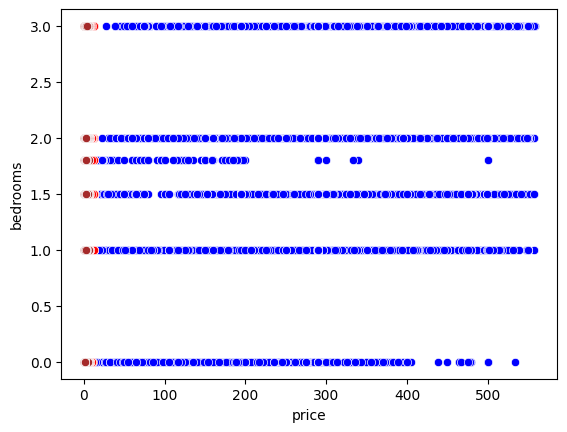

In [18]:
from turtle import color

sns.scatterplot(x='price', y='bedrooms', color="blue", data=f1)
sns.scatterplot(x='accommodates', y='bedrooms', color="red", data=f1)
sns.scatterplot(x='beds', y='bedrooms', color="brown", data=f1)

<Axes: xlabel='accommodates', ylabel='price'>

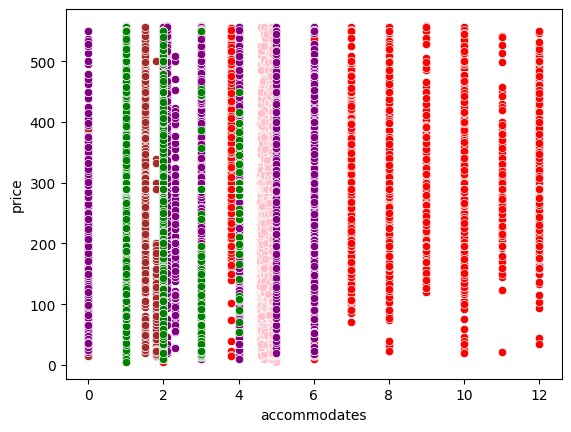

In [19]:
from turtle import color

sns.scatterplot(x='accommodates', y='price', color="red", data=f1)
sns.scatterplot(x='bedrooms', y='price', color="brown", data=f1)
sns.scatterplot(x='review_scores_location', y='price', color="pink", data=f1)
sns.scatterplot(x='beds', y='price', color="purple", data=f1)
sns.scatterplot(x='room_type', y='price', color="green", data=f1)

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_value'>

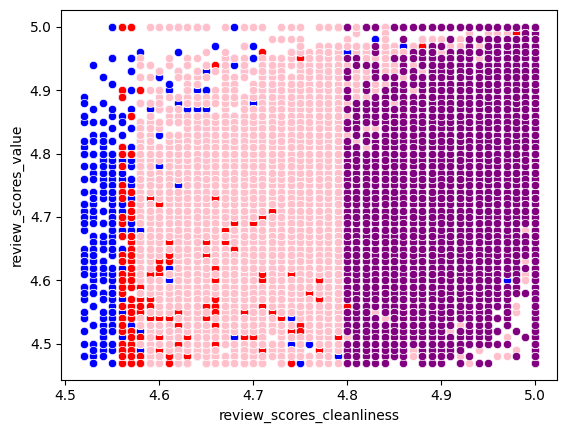

In [21]:
from turtle import color

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_value', color="blue", data=f1)
sns.scatterplot(x='review_scores_rating', y='review_scores_value', color="red", data=f1)
sns.scatterplot(x='review_scores_location', y='review_scores_value', color="pink", data=f1)
sns.scatterplot(x='review_scores_communication', y='review_scores_value', color="purple", data=f1)


<Axes: xlabel='number_of_reviews', ylabel='reviews_per_month'>

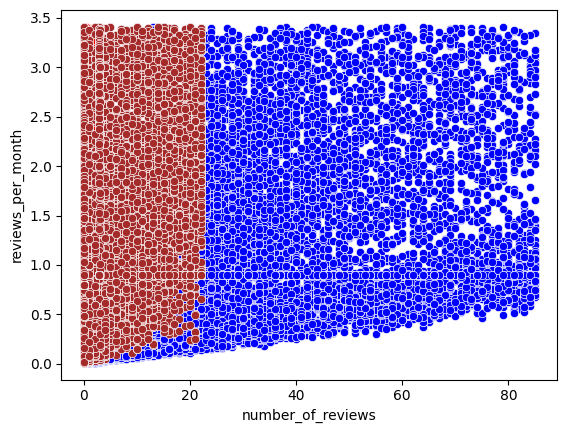

In [22]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='reviews_per_month', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews_l30d', y='reviews_per_month', color="red", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color="brown", data=f1)

**DECLARACIÓN DE VARIABLES DEPENDIENTES E INDEPENDIENTES**

In [26]:
#declaración de las variables independientes que se van a comparar con cada variable dependiente asignada 
Vars_Indep= f1[['number_of_reviews', 'review_scores_cleanliness', 'maximum_nights', 'review_scores_communication', 'reviews_per_month']]
Vars_Indep2=f1[['host_is_superhost', 'reviews_per_month', 'number_of_reviews_ltm', 'number_of_reviews_l30d']]
Vars_Indep3=f1[['number_of_reviews_ltm','number_of_reviews','host_acceptance_rate','review_scores_rating', 'review_scores_value', 'reviews_per_month']]
Vars_Indep4=f1[['room_type','calculated_host_listings_count_entire_homes', 'review_scores_value', 'host_acceptance_rate']]
Vars_Indep5=f1[['price', 'accommodates', 'bedrooms', 'calculated_host_listings_count_entire_homes', 'beds', 'calculated_host_listings_count']]
Vars_Indep6=f1[['bedrooms', 'beds', 'price', 'room_type']]
Vars_Indep7=f1[['accommodates', 'beds', 'price']]
Vars_Indep8=f1[['accommodates', 'bedrooms', 'review_scores_location', 'beds', 'room_type']]
Vars_Indep9=f1[['review_scores_cleanliness', 'review_scores_rating', 'review_scores_location', 'review_scores_communication']]
Vars_Indep10=f1[['number_of_reviews','number_of_reviews_l30d', 'number_of_reviews_ltm']]


In [27]:
#Declaración de variables dependientes
Var_Dep= f1['host_since']
Var_Dep2= f1['host_acceptance_rate']
Var_Dep3= f1['host_is_superhost']
Var_Dep4= f1['calculated_host_listings_count']
Var_Dep5= f1['room_type']
Var_Dep6= f1['accommodates']
Var_Dep7= f1['bedrooms']
Var_Dep8= f1['price']
Var_Dep9= f1['review_scores_value']
Var_Dep10= f1['reviews_per_month']

In [28]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model2=LinearRegression()
model3= LinearRegression()
model4=LinearRegression()
model5= LinearRegression()
model6=LinearRegression()
model7= LinearRegression()
model8=LinearRegression()
model9= LinearRegression()
model10=LinearRegression()

In [29]:
#Verificamos la función relacionada al modelo
type(model)
type(model2)
type(model3)
type(model4)
type(model5)
type(model6)
type(model7)
type(model8)
type(model9)
type(model10)

sklearn.linear_model._base.LinearRegression

In [30]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
model2.fit(X=Vars_Indep2, y=Var_Dep2)
model3.fit(X=Vars_Indep3, y=Var_Dep3)
model4.fit(X=Vars_Indep4, y=Var_Dep4)
model5.fit(X=Vars_Indep5, y=Var_Dep5)
model6.fit(X=Vars_Indep6, y=Var_Dep6)
model7.fit(X=Vars_Indep7, y=Var_Dep7)
model8.fit(X=Vars_Indep8, y=Var_Dep8)
model9.fit(X=Vars_Indep9, y=Var_Dep9)
model10.fit(X=Vars_Indep10, y=Var_Dep10)

LinearRegression()

In [31]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness', 'maximum_nights',
        'review_scores_communication', 'reviews_per_month'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([-9.26115709e+00, -8.42490712e+01, -3.39712840e-01,  1.90650661e+03,
         2.48419527e+02]),
 'rank_': 5,
 'singular_': array([8.85018453e+04, 3.92033972e+03, 1.50561317e+02, 2.13047787e+01,
        8.78797362e+00]),
 'intercept_': np.float64(33998.012463491425)}

In [32]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.048389205712834005

In [33]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost', 'reviews_per_month', 'number_of_reviews_ltm',
        'number_of_reviews_l30d'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([0.02280715, 0.01033578, 0.00071441, 0.00736066]),
 'rank_': 4,
 'singular_': array([1022.060591  ,  151.34764302,  101.50968168,   93.45432065]),
 'intercept_': np.float64(0.9118719674778654)}

In [34]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model2.score(Vars_Indep2,Var_Dep2)

0.10002380556769597

In [35]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews',
        'host_acceptance_rate', 'review_scores_rating',
        'review_scores_value', 'reviews_per_month'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([0.01926939, 0.00485212, 1.37514225, 0.64721497, 0.18581253,
        0.05448246]),
 'rank_': 6,
 'singular_': array([3935.61411832,  959.02529514,  140.31371696,   28.91790927,
          14.54605508,   12.34151364]),
 'intercept_': np.float64(-5.140175481371026)}

In [36]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model3.score(Vars_Indep3,Var_Dep3)

0.17998851573154273

In [37]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type', 'calculated_host_listings_count_entire_homes',
        'review_scores_value', 'host_acceptance_rate'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 1.81755273,  0.85794231, -1.91457588,  4.08698656]),
 'rank_': 4,
 'singular_': array([540.92827522, 106.63203522,  25.84539775,  12.70761634]),
 'intercept_': np.float64(5.104045068538393)}

In [38]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model4.score(Vars_Indep4,Var_Dep4)

0.26724593857195156

In [39]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price', 'accommodates', 'bedrooms',
        'calculated_host_listings_count_entire_homes', 'beds',
        'calculated_host_listings_count'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([-0.00063443, -0.08184845,  0.04551587, -0.07194915,  0.04613842,
         0.02852428]),
 'rank_': 6,
 'singular_': array([22311.7343746 ,   926.10285476,   528.83183618,   429.66968109,
          168.40161954,   125.47968931]),
 'intercept_': np.float64(1.6066227668556734)}

In [40]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model5.score(Vars_Indep5,Var_Dep5)

0.2629715121348971

In [41]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'beds', 'price', 'room_type'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 6.51831394e-01,  1.13121161e+00,  1.85808711e-04, -1.04360532e+00]),
 'rank_': 4,
 'singular_': array([22310.47177659,   245.51786537,   126.33327787,   107.68578694]),
 'intercept_': np.float64(1.776287689805954)}

In [42]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model6.score(Vars_Indep6,Var_Dep6)

0.5972419118950952

In [43]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'beds', 'price'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.08752044, 0.13339837, 0.00176605]),
 'rank_': 3,
 'singular_': array([22311.33457049,   513.02585839,   167.11136781]),
 'intercept_': np.float64(0.5126444562453202)}

In [44]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model7.score(Vars_Indep7,Var_Dep7)

0.3773568050336791

In [45]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'bedrooms', 'review_scores_location', 'beds',
        'room_type'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([  0.76370811,  39.64615544, 109.71516351,  21.35215097,
        -24.07989691]),
 'rank_': 5,
 'singular_': array([574.98806229, 174.64529797, 128.40147946, 102.49097437,
         19.39941394]),
 'intercept_': np.float64(-418.2399027596415)}

In [46]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model8.score(Vars_Indep8,Var_Dep8)

0.2868581239443583

In [47]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model9.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness', 'review_scores_rating',
        'review_scores_location', 'review_scores_communication'],
       dtype=object),
 'n_features_in_': 4,
 'coef_': array([0.17899268, 0.54542623, 0.18683723, 0.00726419]),
 'rank_': 4,
 'singular_': array([29.05877284, 16.56849178, 13.53550702,  8.94322576]),
 'intercept_': np.float64(0.3219230522876675)}

In [48]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model9.score(Vars_Indep9,Var_Dep9)

0.3733983361804645

In [49]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model10.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'number_of_reviews_l30d',
        'number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.00630867, 0.38018705, 0.04549048]),
 'rank_': 3,
 'singular_': array([3935.37322859,  958.05613674,  107.76295421]),
 'intercept_': np.float64(0.5797629242474319)}

In [50]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model10.score(Vars_Indep10,Var_Dep10)

0.2997308011268581

In [51]:
#Predecimos los valores a partir de las variables independientes 
y_pred= model.predict(X=Vars_Indep)
y_pred

array([43192.46550269, 43224.73822253, 43192.46550269, ...,
       43192.46550269, 43657.30705818, 42819.11051279], shape=(45533,))

In [52]:
#Predecimos los valores a partir de las variables independientes 
y_pred2= model2.predict(X=Vars_Indep2)
y_pred2

array([0.92014059, 0.92014059, 0.92014059, ..., 0.92014059, 0.9720336 ,
       0.92329922], shape=(45533,))

In [53]:
#Predecimos los valores a partir de las variables independientes 
y_pred3= model3.predict(X=Vars_Indep3)
y_pred3

array([0.20429205, 0.20429205, 0.20429205, ..., 0.34180627, 0.54388461,
       0.31695443], shape=(45533,))

In [54]:
#Predecimos los valores a partir de las variables independientes 
y_pred4= model4.predict(X=Vars_Indep4)
y_pred4

array([4.84169072, 2.2678638 , 4.84169072, ..., 3.63617288, 2.77229125,
       2.21042653], shape=(45533,))

In [55]:
#Predecimos los valores a partir de las variables independientes 
y_pred5= model5.predict(X=Vars_Indep5)
y_pred5

array([0.9608068 , 1.41304802, 0.94145429, ..., 1.29650038, 1.37204593,
       1.17877227], shape=(45533,))

In [56]:
#Predecimos los valores a partir de las variables independientes 
y_pred6= model6.predict(X=Vars_Indep6)
y_pred6

array([6.15594905, 4.6919049 , 6.16245236, ..., 3.64829957, 1.88544778,
       7.27582633], shape=(45533,))

In [57]:
#Predecimos los valores a partir de las variables independientes 
y_pred7= model7.predict(X=Vars_Indep7)
y_pred7

array([2.14261793, 1.50559774, 2.20442983, ..., 1.76815906, 1.02594602,
       2.16828698], shape=(45533,))

In [58]:
#Predecimos los valores a partir de las variables independientes 
y_pred8= model8.predict(X=Vars_Indep8)
y_pred8

array([282.86166947, 225.21417589, 282.86166947, ..., 203.42540332,
       104.99824912, 287.75654591], shape=(45533,))

In [59]:
#Predecimos los valores a partir de las variables independientes 
y_pred9= model9.predict(X=Vars_Indep9)
y_pred9

array([4.82339908, 4.82339908, 4.82339908, ..., 4.82339908, 4.73738843,
       4.74466417], shape=(45533,))

In [60]:
#Predecimos los valores a partir de las variables independientes 
y_pred10= model10.predict(X=Vars_Indep10)
y_pred10

array([0.57976292, 0.57976292, 0.57976292, ..., 0.57976292, 0.90838499,
       0.88291935], shape=(45533,))

In [61]:
#Insertamos la columna de predicciones en el DataFrame
f1.insert(0, 'Pred_host_since', y_pred)
f1.insert(1, 'Pred_hrr', y_pred2)
f1.insert(2, 'Pred_his', y_pred3)
f1.insert(3, 'Pred_chl', y_pred4)
f1.insert(4, 'Pred_room', y_pred5)
f1.insert(5, 'Pred_accommodates', y_pred6)
f1.insert(6, 'Pred_bedrooms', y_pred7)
f1.insert(7, 'Pred_price', y_pred8)
f1.insert(8, 'Pred_rsv', y_pred9)
f1.insert(9, 'Pred_rpm', y_pred10)
f1

,Pred_host_since,Pred_hrr,Pred_his,Pred_chl,Pred_room,Pred_accommodates,Pred_bedrooms,Pred_price,Pred_rsv,Pred_rpm,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,43192.465503,0.920141,0.204292,4.841691,0.960807,6.155949,2.142618,282.861669,4.823399,0.579763,...,4.90,5.00,5.00,4.90,4.80,3.9,4.0,0.2,0.0,0.80
1,43224.738223,0.920141,0.204292,2.267864,1.413048,4.691905,1.505598,225.214176,4.823399,0.579763,...,4.90,5.00,5.00,4.90,4.80,1.0,1.0,0.0,0.0,0.80
2,43192.465503,0.920141,0.204292,4.841691,0.941454,6.162452,2.204430,282.861669,4.823399,0.579763,...,4.90,5.00,5.00,4.90,4.80,4.0,4.0,0.0,0.0,0.80
3,42990.948988,0.912492,0.168827,4.085417,1.545641,1.481225,0.907620,144.701844,4.859982,0.586072,...,5.00,5.00,5.00,5.00,4.80,4.0,1.0,0.2,0.0,0.06
4,43540.753145,0.971996,0.698465,4.245535,1.212237,1.906816,1.229042,99.512491,4.822319,0.989267,...,4.98,4.93,5.00,4.73,4.77,3.0,3.0,0.0,0.0,3.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45528,43192.465503,0.920141,0.341806,2.676562,1.367532,4.040074,1.505598,185.568020,4.823399,0.579763,...,4.90,5.00,5.00,4.90,4.80,1.0,1.0,0.0,0.0,0.80
45529,43192.465503,0.920141,0.204292,2.267864,1.322096,4.561539,1.593118,218.048653,4.823399,0.579763,...,4.90,5.00,5.00,4.90,4.80,1.0,1.0,0.0,0.0,0.80
45530,43192.465503,0.920141,0.341806,3.636173,1.296500,3.648300,1.768159,203.425403,4.823399,0.579763,...,4.90,5.00,5.00,4.90,4.80,3.0,0.0,0.2,0.0,0.80
45531,43657.307058,0.972034,0.543885,2.772291,1.372046,1.885448,1.025946,104.998249,4.737388,0.908385,...,4.73,4.92,4.94,4.78,4.75,1.0,1.0,0.0,0.0,3.20


**GRÁFICAS PREDICCIONES**

<Axes: xlabel='number_of_reviews', ylabel='host_since'>

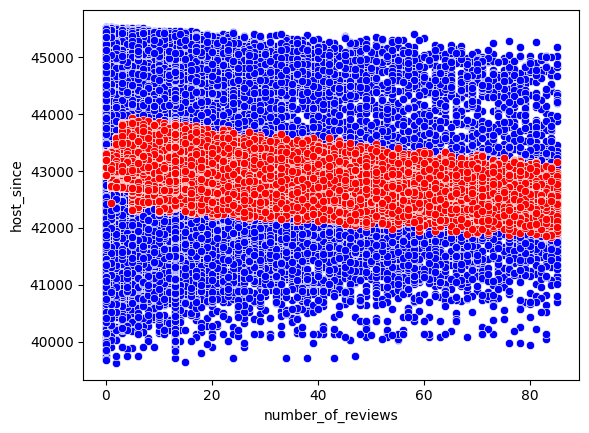

In [63]:
#Visualizamos la gráfica comparativa entre el id con number of reviews y el predicido

sns.scatterplot(x='number_of_reviews', y='host_since', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews', y='Pred_host_since', color="red", data=f1)

<Axes: xlabel='host_is_superhost', ylabel='host_acceptance_rate'>

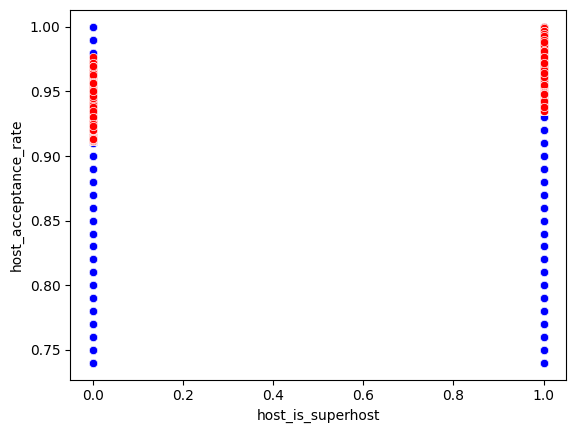

In [64]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='host_is_superhost', y='host_acceptance_rate', color="blue", data=f1)
sns.scatterplot(x='host_is_superhost', y='Pred_hrr', color="red", data=f1)

<Axes: xlabel='number_of_reviews_ltm', ylabel='host_is_superhost'>

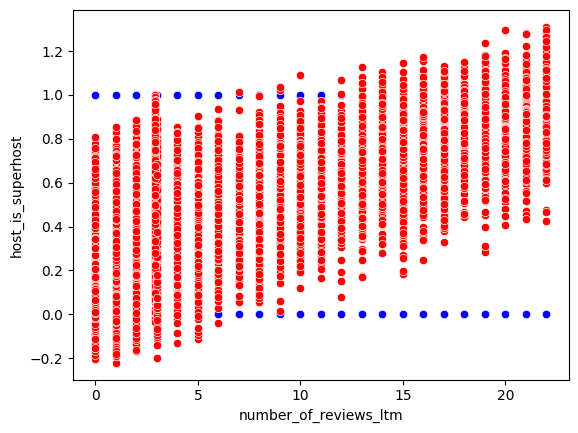

In [65]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='number_of_reviews_ltm', y='host_is_superhost', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='Pred_his', color="red", data=f1)

<Axes: xlabel='room_type', ylabel='calculated_host_listings_count'>

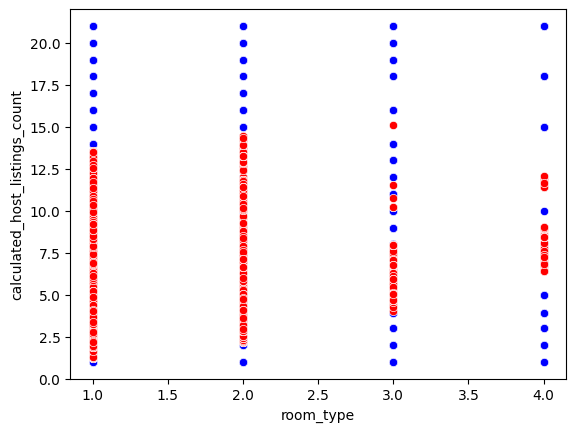

In [66]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='room_type', y='calculated_host_listings_count', color="blue", data=f1)
sns.scatterplot(x='room_type', y='Pred_chl', color="red", data=f1)

<Axes: xlabel='calculated_host_listings_count_entire_homes', ylabel='room_type'>

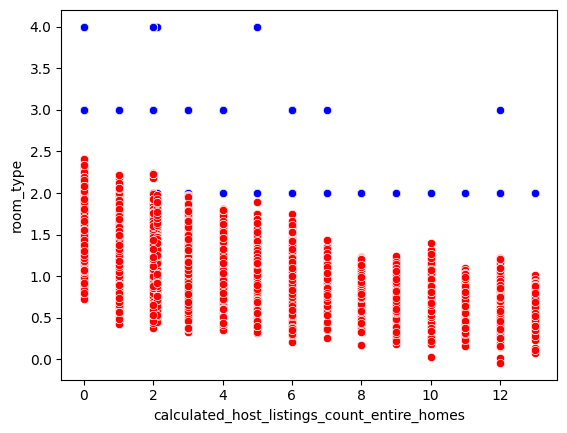

In [67]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='room_type', color="blue", data=f1)
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='Pred_room', color="red", data=f1)

<Axes: xlabel='bedrooms', ylabel='accommodates'>

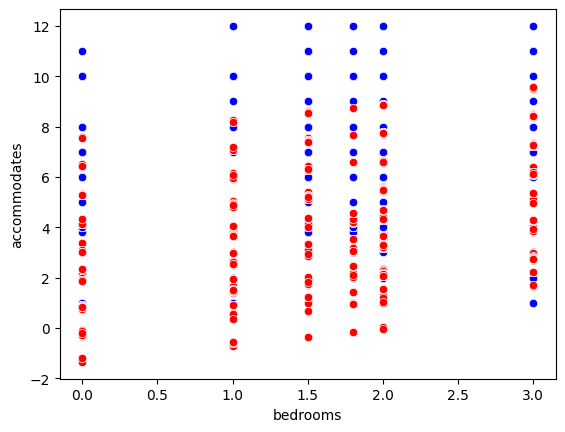

In [68]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='bedrooms', y='accommodates', color="blue", data=f1)
sns.scatterplot(x='bedrooms', y='Pred_accommodates', color="red", data=f1)

<Axes: xlabel='accommodates', ylabel='bedrooms'>

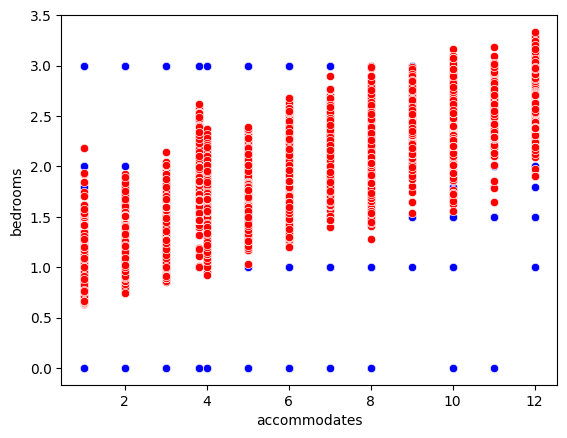

In [69]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='accommodates', y='bedrooms', color="blue", data=f1)
sns.scatterplot(x='accommodates', y='Pred_bedrooms', color="red", data=f1)

<Axes: xlabel='accommodates', ylabel='price'>

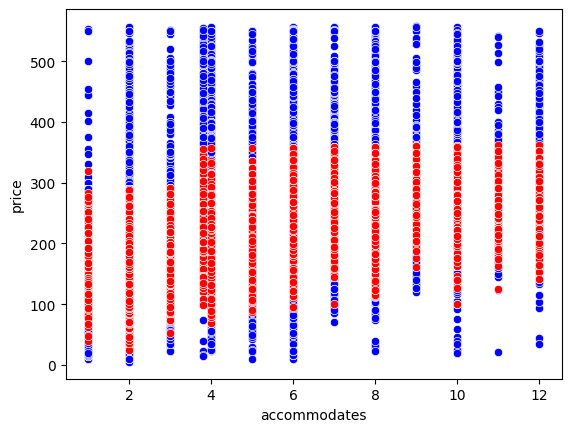

In [70]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='accommodates', y='price', color="blue", data=f1)
sns.scatterplot(x='accommodates', y='Pred_price', color="red", data=f1)

<Axes: xlabel='review_scores_rating', ylabel='review_scores_value'>

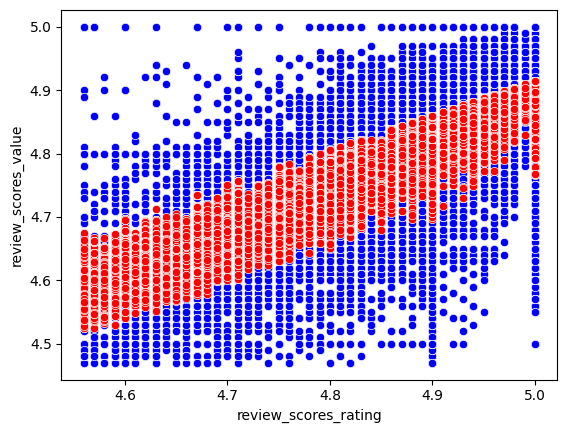

In [71]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='review_scores_rating', y='review_scores_value', color="blue", data=f1)
sns.scatterplot(x='review_scores_rating', y='Pred_rsv', color="red", data=f1)

<Axes: xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

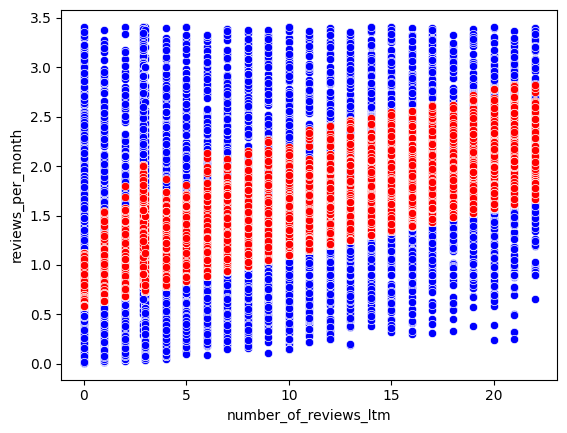

In [72]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='Pred_rpm', color="red", data=f1)

**DETERMINAMOS COEFICIENTES DE DETERMINACIÓN**

In [73]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.048389205712834005

In [74]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model2.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter2

0.10002380556769597

In [75]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model3.score(X=Vars_Indep3, y=Var_Dep3)
coef_Deter3

0.17998851573154273

In [76]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4=model4.score(X=Vars_Indep4, y=Var_Dep4)
coef_Deter4

0.26724593857195156

In [77]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5=model5.score(X=Vars_Indep5, y=Var_Dep5)
coef_Deter5

0.2629715121348971

In [78]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6=model6.score(X=Vars_Indep6, y=Var_Dep6)
coef_Deter6

0.5972419118950952

In [79]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7=model7.score(X=Vars_Indep7, y=Var_Dep7)
coef_Deter7

0.3773568050336791

In [80]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8=model8.score(X=Vars_Indep8, y=Var_Dep8)
coef_Deter8

0.2868581239443583

In [81]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter9=model9.score(X=Vars_Indep9, y=Var_Dep9)
coef_Deter9

0.3733983361804645

In [82]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter10=model10.score(X=Vars_Indep10, y=Var_Dep10)
coef_Deter10

0.2997308011268581

**COEFICIENTES DE CORRELACION**

In [83]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.21997546616119262)

In [84]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.31626540368446243)

In [85]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.424250534155872)

In [86]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.5169583528408759)

In [87]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.5128074805761876)

In [88]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.7728142803384881)

In [89]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.6142937449084754)

In [90]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.5355913777726059)

In [91]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl9

np.float64(0.6110632832861622)

In [92]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl10=np.sqrt(coef_Deter10)
coef_Correl10

np.float64(0.5474767585266594)